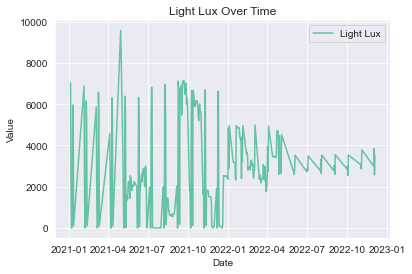

In [1]:
# Import the libraries
import pandas as pd
from datetime import datetime
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Define the file pattern to look for
file_pattern = 'Light'

# Define the allowed file extensions
allowed_extensions = ['.xls', '.xlsx']

# Create an empty list to store the matching file names
file_list = []

# Loop through all files in the directory
for filename in os.listdir():
    # Check if the filename contains the specified pattern
    if file_pattern in filename:
        # Check if the file has an allowed extension
        if any(ext in filename for ext in allowed_extensions):
            # Add the filename to the list
            file_list.append(filename)

# Create empty DataFrame to store merged data
merged_df = pd.DataFrame()

# Loop through each file
for i in file_list:
    # Read in file as DataFrame
    df = pd.read_excel(i)
    
    # Append DataFrame to merged_df
    merged_df = pd.concat([merged_df, df])
    
# Reset index of merged_df
merged_df.reset_index(inplace=True, drop=True)

# Change the date format from xx/xx/xx to xx-xx-xx
merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce')
merged_df['Date'] = merged_df['Date'].dt.strftime('%m-%d-%Y %I:%M %p')
merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.date

# Creating a new DataFrame to hold relevant data
df = merged_df[['SensorID','Date','Value']]

# Renaming the columns
df = df.rename(columns={'Value': 'Light Lux'})

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert the 'SensorID' column to string
df['SensorID'] = df['SensorID'].astype(str)

# Define a lambda function to extract the substring from a string
def extract_substring(s):
    if "-" in s:
        return s.split("-")[1].strip()
    else:
        return s

# Apply the lambda function to the 'SensorID' column
df['SensorID'] = df['SensorID'].apply(extract_substring)

# Convert CO2 TWA to int
df['Light Lux'] = df['Light Lux'].astype(int)

# Grouping by Date and getting the mean for each data point
df = df.groupby(df['Date'])[['Light Lux']].mean()

# Move the 'Date' index back to a regular column
df = df.reset_index()

# Export to CSV
df.to_csv('Light Lux DATA.csv',index=False)

# Set Seaborn style
sns.set_style("darkgrid")
sns.set_palette("Set2")

# create the plot
sns.lineplot(x="Date", y="Light Lux", data=df, label="Light Lux")

# set the title and axes labels
plt.title("Light Lux Over Time")
plt.xlabel("Date")
plt.ylabel("Value")

# Save the plot to a file
plt.savefig('Light Lux DATA.png')